# Kaggle competition:
    https://www.kaggle.com/c/statoil-iceberg-classifier-challenge

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
train = pd.read_json('./data/processed/train.json')

In [3]:
train.head()

,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0
1,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0


In [4]:
train.describe() # This function is more suitable for table of numeric values

,is_iceberg
count,1604.000000
mean,0.469451
std,0.499222
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### Samples of iceberg and ship images

In [5]:
icebergs=train[train.is_iceberg==1].sample(9)
ships=train[train.is_iceberg==0].sample(9)

#### Band-1

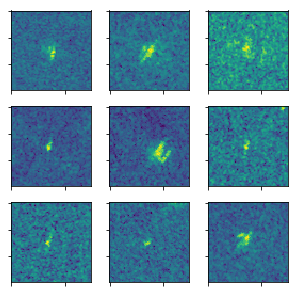

In [6]:
fig = plt.figure(figsize=(5,5))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    im1 = np.reshape(np.array(icebergs.iloc[i,0]),(75,75))
    ax.imshow(im1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
plt.show()

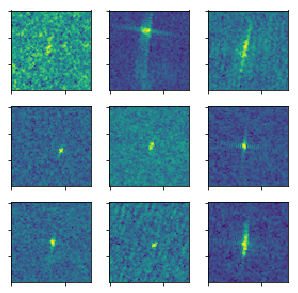

In [7]:
fig = plt.figure(figsize=(5,5))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    im1 = np.reshape(np.array(ships.iloc[i,0]),(75,75))
    ax.imshow(im1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
plt.show()

#### Band-2

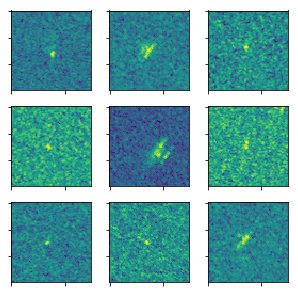

In [8]:
fig = plt.figure(figsize=(5,5))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    im1 = np.reshape(np.array(icebergs.iloc[i,1]),(75,75))
    ax.imshow(im1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
plt.show()

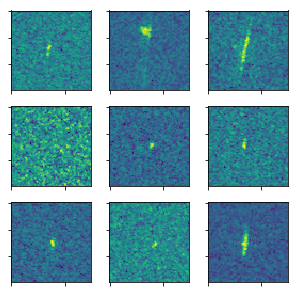

In [9]:
fig = plt.figure(figsize=(5,5))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    im1 = np.reshape(np.array(ships.iloc[i,1]),(75,75))
    ax.imshow(im1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
plt.show()

#### Histogram of incident angle

In [10]:
incangle=train['inc_angle'] # of type 'O' for object - not usable
incangle=pd.to_numeric(incangle,errors='coerce')
len(incangle[np.isnan(incangle)])
incangle.describe()

count    1471.000000
mean       39.268707
std         3.839744
min        24.754600
25%        36.106100
50%        39.501500
75%        42.559100
max        45.937500
Name: inc_angle, dtype: float64

There are 133 NaN entries in incident angle.
By looking at its histogram, there is an outlier of 0 degree. 
-> Does the test data set have similar structure?
-> Does incident angle have predictive power? think about causation. 

C:\Users\hieu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\hieu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


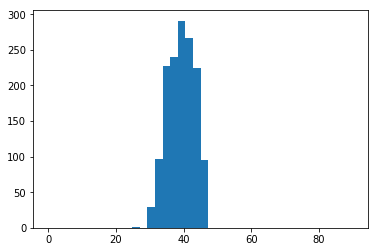

In [11]:
plt.hist(incangle,range=[0,90],bins=40);

#### More on these NaN inc_angle and 0-degree 

In [12]:
train.iloc[np.squeeze(np.argwhere(np.isnan(incangle))),4].describe()

count    133.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: is_iceberg, dtype: float64

So all of NaN-valued incident angle are from ships result. What about 0-degree?

In [13]:
np.min(incangle)

24.7546

0-degree count is maybe a bug(?!).
What (ship/iceberg) correspond to minimum angle? 

In [14]:
train.iloc[np.argmin(incangle),4]

0

Count iceberg/ship distribution

In [15]:
sum(train.iloc[:,4])

753

There are 753 iceberg images in train data set. 

### Plotting very helpful statistics (from MuonNeutrino kernel)

In [16]:
def get_stats(train,label=1):
    train['max_band'+str(label)] = [np.max(np.array(x)) for x in train['band_'+str(label)] ]
    train['min_band'+str(label)] = [np.min(np.array(x)) for x in train['band_'+str(label)] ]
    train['std_band'+str(label)] = [np.std(np.array(x)) for x in train['band_'+str(label)] ]
    train['mean_band'+str(label)] = [np.mean(np.array(x)) for x in train['band_'+str(label)] ]
    return train


def plot_var(name,nbins=50):
    minval = train[name].min()
    maxval = train[name].max()
    plt.hist(train.loc[train.is_iceberg==1,name],range=[minval,maxval],
             bins=nbins,color='b',alpha=0.9,label='Ship')
    plt.hist(train.loc[train.is_iceberg==0,name],range=[minval,maxval],
             bins=nbins,color='r',alpha=0.9,label='Iceberg')
    plt.legend()
    plt.xlim([minval,maxval])
    plt.xlabel(name)
    plt.ylabel('Count')
    

In [17]:
train = get_stats(train,1)
train = get_stats(train,2)
train['inc_angle'] = incangle

C:\Users\hieu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\hieu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


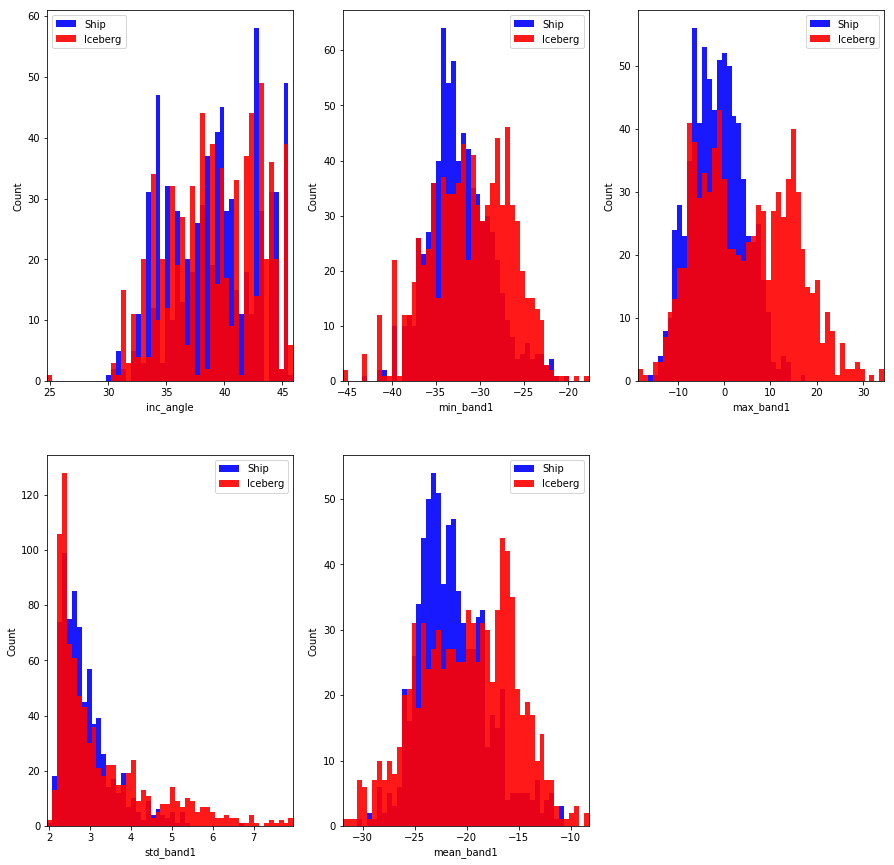

In [18]:
fig = plt.figure(figsize=(15,15))
i=0
for col in ['inc_angle','min_band1','max_band1','std_band1','mean_band1']:
    ax = fig.add_subplot(2,3,i+1)
    plot_var(col)
    i=i+1
plt.show()

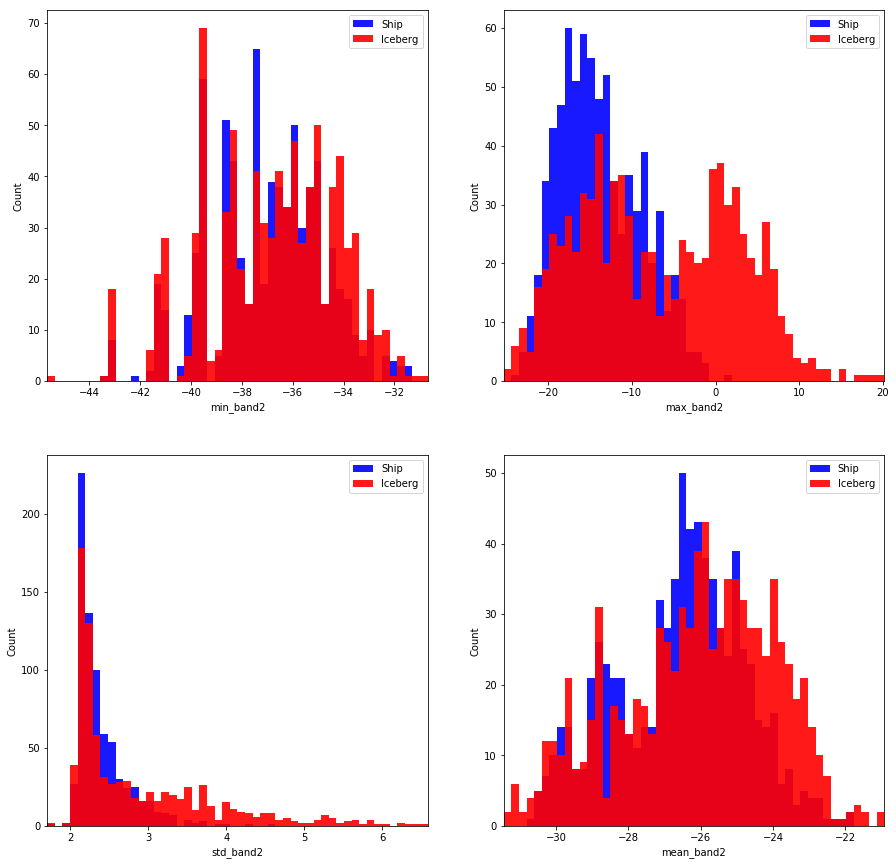

In [19]:
fig = plt.figure(figsize=(15,15))
i=0
for col in ['min_band2','max_band2','std_band2','mean_band2']:
    ax = fig.add_subplot(2,2,i+1)
    plot_var(col)
    i=i+1
plt.show()

## Classify using Keras

https://medium.com/@the1ju/simple-logistic-regression-using-keras-249e0cc9a970

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [21]:
train = pd.read_json('./data/processed/train.json');
train['inc_angle']=pd.to_numeric(train['inc_angle'],errors='coerce');
train=train.dropna(axis=0,how='any');

In [32]:
b1=[np.asarray(b) for b in train['band_1'].values]
b2=[np.asarray(b) for b in train['band_2'].values]

In [35]:
X_data = np.column_stack((b1,b2,train['inc_angle'].values))
y_data = train['is_iceberg']
X_train, X_dev, y_train, y_dev = train_test_split(X_data, y_data, random_state=16, test_size=0.1)

In [36]:
X_train.shape

(1323, 11251)

In [39]:
model=Sequential()
model.add(Dense(1,activation='sigmoid',input_dim=X_train.shape[1]))
model.compile(optimizer='adam',loss='binary_crossentropy')
model.fit(X_train,y_train,epochs=30, validation_data=(X_dev,y_dev))

Train on 1323 samples, validate on 148 samples
Epoch 1/30
1323/1323 [==============================] - 0s 377us/step - loss: 7.7126 - val_loss: 8.4021
Epoch 2/30
1323/1323 [==============================] - 0s 189us/step - loss: 7.7121 - val_loss: 8.4021
Epoch 3/30
1323/1323 [==============================] - 0s 203us/step - loss: 7.7121 - val_loss: 8.4021
Epoch 4/30
1323/1323 [==============================] - 0s 207us/step - loss: 7.7121 - val_loss: 8.4021
Epoch 5/30
1323/1323 [==============================] - 0s 190us/step - loss: 7.7121 - val_loss: 8.4021
Epoch 6/30
1323/1323 [==============================] - 0s 202us/step - loss: 7.7121 - val_loss: 8.4021
Epoch 7/30
1323/1323 [==============================] - 0s 192us/step - loss: 7.7121 - val_loss: 8.4021
Epoch 8/30
1323/1323 [==============================] - 0s 256us/step - loss: 7.7121 - val_loss: 8.4021
Epoch 9/30
1323/1323 [==============================] - 0s 190us/step - loss: 7.7121 - val_loss: 8.4021
Epoch 10/30
1323/

In [40]:
score = model.evaluate(X_dev, y_dev, verbose=1)

148/148 [==============================] - 0s 169us/step


In [41]:
score

8.4020676999478727

In [42]:
test = pd.read_json('./data/processed/test.json')

In [43]:
test['inc_angle']=pd.to_numeric(test['inc_angle'],errors='coerce');
test=test.dropna(axis=0,how='any');
b1=[np.asarray(b) for b in test['band_1'].values]
b2=[np.asarray(b) for b in test['band_2'].values]
X_test = np.column_stack((b1,b2,test['inc_angle'].values))

In [44]:
predicted_test=model.predict_proba(X_test)

8424/8424 [==============================] - 3s 355us/step


In [47]:
np.shape(predicted_test)

(8424, 1)